In [ ]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 박스 플롯 hue 구현 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
tips = sns.load_dataset('tips')

# 데이터 준비
days = tips['day'].unique()
smokers = tips['smoker'].unique()

plt.figure(figsize=(8, 5))

# 각 day와 smoker 그룹별로 박스플롯 그리기
positions = []
data_to_plot = []
pos = 1

for day in sorted(days):  # day 순서대로
    for smoker in sorted(smokers):  # smoker = No, Yes
        group = tips[(tips['day'] == day) & (tips['smoker'] == smoker)]['total_bill']
        data_to_plot.append(group)
        positions.append(pos)
        pos += 1
    pos += 1  # day 사이 간격

# 박스플롯 그리기
bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# 색상 채우기 (smoker 구분)
colors = ['lightblue', 'lightcoral'] * len(days)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x축 레이블: day 가운데 배치
xticks = []
xlabels = []
for i, day in enumerate(sorted(days)):
    xticks.append((i* (len(smokers)+1)) + 1.5)  # day 그룹의 중앙
    xlabels.append(day)

plt.xticks(xticks, xlabels)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title('Total Bill Distribution by Day and Smoker')

# 범례 추가
from matplotlib.patches import Patch
legend_handles = [Patch(color='lightblue', label='No'),
                  Patch(color='lightcoral', label='Yes')]
plt.legend(handles=legend_handles, title="smoker")

plt.show()

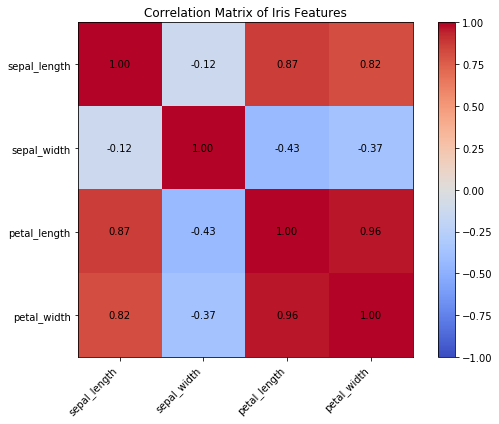

In [49]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 heatmap 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
iris = sns.load_dataset('iris')

# 수치형 변수 간 상관계수 계산
corr = iris.corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# imshow로 색상 맵 시각화
cax = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름으로 x, y축 라벨 설정
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# 각 셀에 상관계수 값 표시
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black')

# 컬러바 추가
fig.colorbar(cax)

plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from statsmodels.stats.weightstats import ztest
import numpy as np

# 표본 데이터 생성 (실제로는 측정된 데이터 사용)
np.random.seed(0)
sample_iq = np.random.normal(loc=105, scale=15, size=30)

# 모집단 평균 (기준값)
pop_mean = 100

# 단일표본 Z-검정 수행
# value: 귀무가설에서의 평균 (μ₀)
# ddof=0: 모집단 표준편차를 사용한다는 의미 (기본값)
z_statistic, p_value = ztest(sample_iq, value=pop_mean)

print("--- One-sample Z-test ---")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("귀무가설 기각: 프로그램은 IQ에 유의미한 영향을 미쳤습니다.")
else:
    print("귀무가설 기각 실패: 프로그램의 영향이 유의미하지 않습니다.")

--- One-sample Z-test ---
Z-statistic: 3.8637
P-value: 0.0001
귀무가설 기각: 프로그램은 IQ에 유의미한 영향을 미쳤습니다.


In [2]:
# 표본 데이터 생성
np.random.seed(1)
sample_a_height = np.random.normal(loc=175, scale=5, size=50)
sample_b_height = np.random.normal(loc=173, scale=6, size=60)

# 독립표본 Z-검정 수행
# value=0: 두 평균의 차이가 0이라는 귀무가설
z_statistic, p_value = ztest(sample_a_height, sample_b_height, value=0)

print("--- Two-sample Z-test ---")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("귀무가설 기각: 두 도시의 평균 키는 유의미하게 다릅니다.")
else:
    print("귀무가설 기각 실패: 두 도시의 평균 키는 차이가 없습니다.")

--- Two-sample Z-test ---
Z-statistic: 1.2027
P-value: 0.2291
귀무가설 기각 실패: 두 도시의 평균 키는 차이가 없습니다.


In [3]:
from statsmodels.stats.proportion import proportions_ztest

# 데이터 설정
count = np.array([150, 240]) # 각 그룹에서 성공(인지)한 횟수
nobs = np.array([1000, 1200]) # 각 그룹의 전체 관측(표본) 수

# 두 집단 비율 Z-검정 수행
z_statistic, p_value = proportions_ztest(count, nobs, value=0)

print("--- Z-test for two proportions ---")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("귀무가설 기각: 광고 캠페인 전후의 인지도는 유의미하게 다릅니다.")
else:
    print("귀무가설 기각 실패: 인지도 차이가 유의미하지 않습니다.")

--- Z-test for two proportions ---
Z-statistic: -3.0577
P-value: 0.0022
귀무가설 기각: 광고 캠페인 전후의 인지도는 유의미하게 다릅니다.
